# Iris Species Prediction

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [2]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


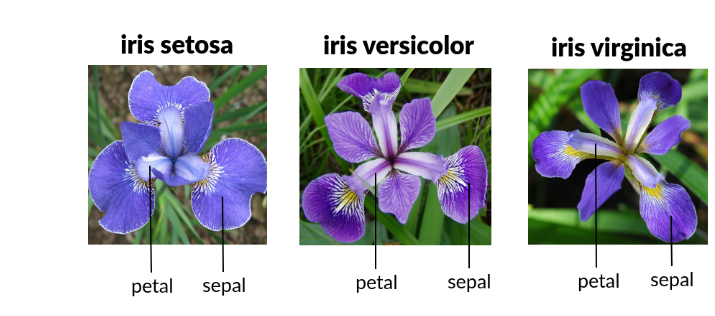

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Check missing values in dataframe

In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Species value counts

In [5]:
df['species'].value_counts()


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### This a multiclass classitification problem

### Seprate X and Y

In [6]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [7]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


### Create a preprocessing pipeline for X

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [10]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [11]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### Saving num_pipe in pickle format

In [12]:
import pickle
with open('preprocess.pkl', 'wb') as file1:
    pickle.dump(num_pipe, file1)

### Loading a pickle file

In [13]:
with open('preprocess.pkl', 'rb') as file2:
    pre = pickle.load(file2)

In [14]:
pre

Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler())])

### Apply train test split

In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.33, random_state=42)

In [16]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
96,-0.173674,-0.362176,0.251221,0.132510
105,2.128516,-0.131979,1.615320,1.185567
66,-0.294842,-0.131979,0.421734,0.395774
0,-0.900681,1.019004,-1.340227,-1.315444
122,2.249683,-0.592373,1.672157,1.053935


In [17]:
ytrain.head()

,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


In [18]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
73,0.310998,-0.592373,0.535409,0.000878
18,-0.173674,1.709595,-1.169714,-1.183812
118,2.249683,-1.052767,1.785832,1.448832
78,0.189830,-0.362176,0.421734,0.395774
76,1.159173,-0.592373,0.592246,0.264142


In [19]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


In [20]:
xtrain.shape

(100, 4)

In [21]:
xtest.shape

(50, 4)

### Create a Logistic Regression Model

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [23]:
model.score(xtrain, ytrain)

0.96

In [24]:
model.score(xtest, ytest)

0.98

### Saving the model object

In [25]:
with open('Model.pkl', 'wb') as file3:
    pickle.dump(model, file3)

### Loading the model 

In [26]:
with open('Model.pkl', 'rb') as file4:
    lr = pickle.load(file4)

In [27]:
lr

LogisticRegression()

### Evaluate the model in train and test

In [28]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [29]:
ypred_tr[0:5]

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica'],
      dtype=object)

In [30]:
ytrain.head()

,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


In [31]:
ypred_ts[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [32]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


### Create a confusion matrix for test

In [33]:
c = model.classes_
c

array(['setosa', 'versicolor', 'virginica'], dtype=object)

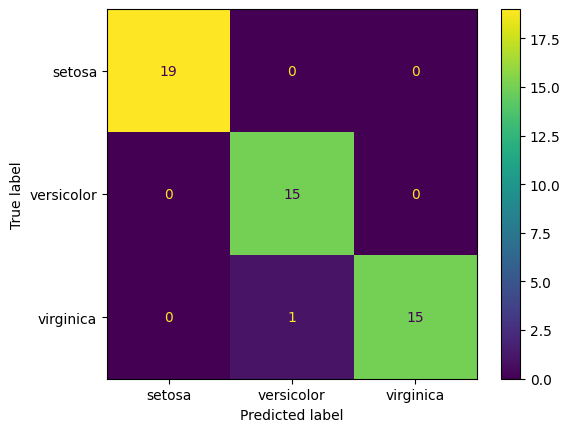

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=c)
cfd.plot()

### Print the classification report

In [35]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



### Predciting out of sample data for each entry as input from user

In [36]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
96,-0.173674,-0.362176,0.251221,0.132510
105,2.128516,-0.131979,1.615320,1.185567
66,-0.294842,-0.131979,0.421734,0.395774
0,-0.900681,1.019004,-1.340227,-1.315444
122,2.249683,-0.592373,1.672157,1.053935


In [37]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [38]:
def predict_species(pre, model):
    # Input from users
    sep_len = float(input('Sepal Length : '))
    sep_wid = float(input('Sepal Width : '))
    pet_len = float(input('Petal Length : '))
    pet_wid = float(input('Petal Width : '))
    # Convert above in Dataframe 
    xnew = pd.DataFrame([sep_len, sep_wid, pet_len, pet_wid]).T 
    xnew.columns = pre.get_feature_names_out()
    print('Dataframe before Preprocessing : \n')
    display(xnew)
    # Preprocess above dataframe
    xnew_pre = pre.transform(xnew)
    print('\n==============================================================\n')
    print('Dataframe after Preprocessing :\n')
    display(xnew_pre)
    # Predict the results
    pred = model.predict(xnew_pre)
    prob = model.predict_proba(xnew_pre).max()
    return pred[0], prob

In [39]:
predict_species(num_pipe, model)

Dataframe before Preprocessing : 



,sepal_length,sepal_width,petal_length,petal_width
0,5.8,2.6,4.0,1.2




Dataframe after Preprocessing :



,sepal_length,sepal_width,petal_length,petal_width
0,-0.052506,-1.052767,0.137547,0.000878


('versicolor', 0.9151132111554282)

In [40]:
predict_species(num_pipe, model)

Dataframe before Preprocessing : 



,sepal_length,sepal_width,petal_length,petal_width
0,6.7,3.3,5.7,2.5




Dataframe after Preprocessing :



,sepal_length,sepal_width,petal_length,petal_width
0,1.038005,0.558611,1.103783,1.712096


('virginica', 0.9824152539782253)

In [41]:
predict_species(num_pipe, model)

Dataframe before Preprocessing : 



,sepal_length,sepal_width,petal_length,petal_width
0,4.8,3.4,1.9,0.2




Dataframe after Preprocessing :



,sepal_length,sepal_width,petal_length,petal_width
0,-1.264185,0.788808,-1.056039,-1.315444


('setosa', 0.9724671063108338)

In [42]:
predict_species(num_pipe, model)

Dataframe before Preprocessing : 



,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.1,1.2




Dataframe after Preprocessing :



,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.510739,0.000878


('setosa', 0.9473722207744009)